In [15]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler

In [3]:
dataset=pd.read_csv(r'C:\Users\shris\Downloads\archive (6).zip')

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

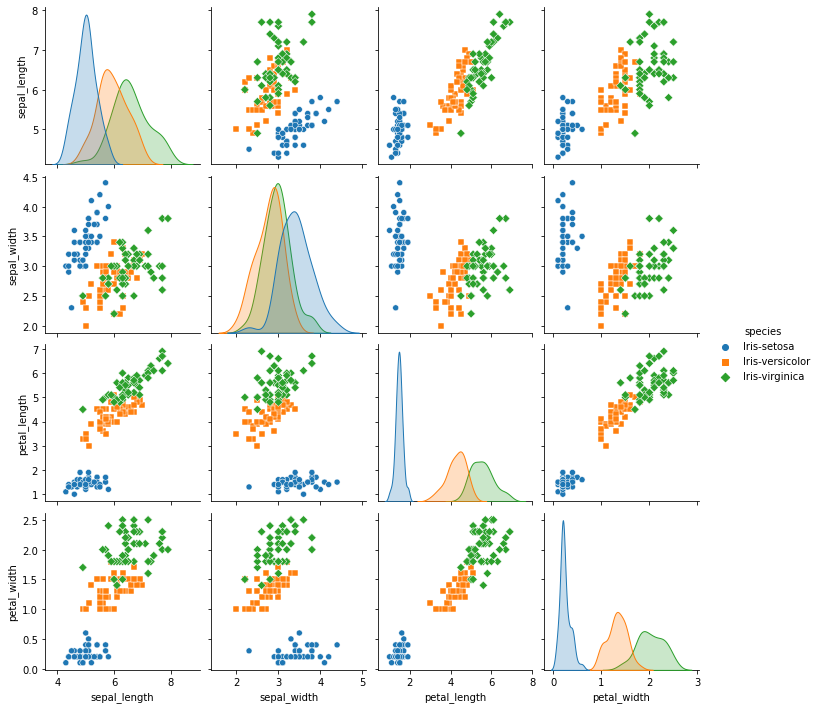

In [7]:
sns.pairplot(dataset, hue='species', markers=["o", "s", "D"])

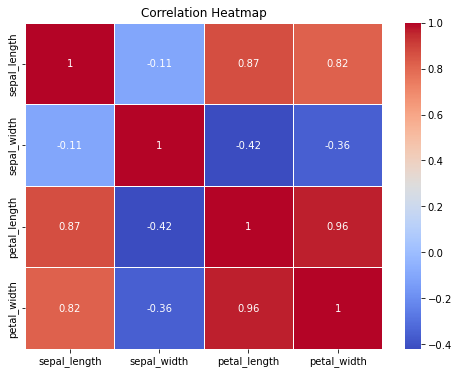

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

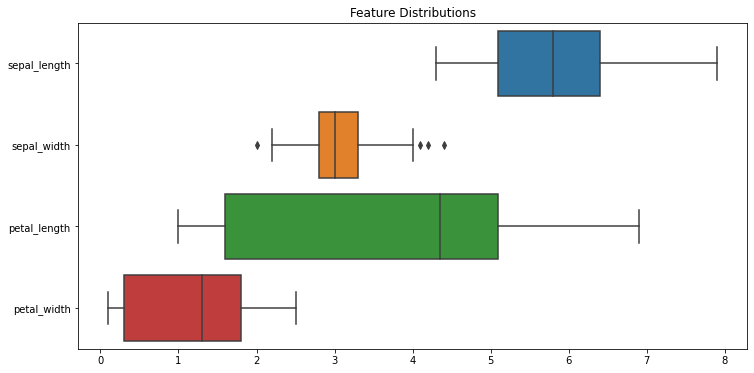

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, orient='h')
plt.title("Feature Distributions")
plt.show()

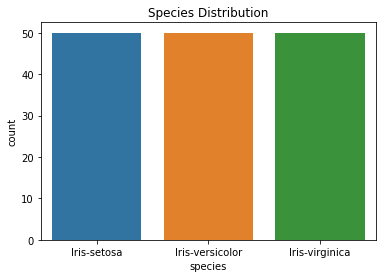

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='species')
plt.title("Species Distribution")
plt.show()

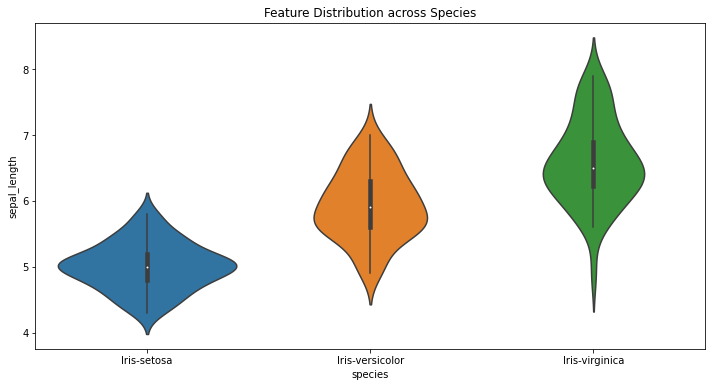

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset, x='species', y='sepal_length')
plt.title("Feature Distribution across Species")
plt.show()

In [13]:
x = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [16]:
le = LabelEncoder()

In [17]:
dataset['species']=le.fit_transform(dataset['species'])
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
y = dataset[['species']]

In [19]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [20]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=4)

In [25]:
from sklearn.linear_model import LogisticRegression


In [28]:
model=LogisticRegression()

In [29]:
model.fit(x_train,y_train)

C:\Users\shris\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.coef_

array([[-0.42874838,  0.91002749, -2.40038482, -1.00826105],
       [ 0.5596617 , -0.27604685, -0.23356354, -0.90421874],
       [-0.13091332, -0.63398064,  2.63394836,  1.91247979]])

In [31]:
model.intercept_

array([  9.44627067,   1.97653478, -11.42280546])

In [32]:
y_pred=model.predict(x_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [33]:
y_test

,species
128,2
18,0
130,2
105,2
107,2
78,1
83,1
14,0
5,0
133,2


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

In [36]:
model.score(x_test,y_test)

0.9666666666666667